# A3-Q5: Time of Death

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## (a) Dynamics Function

In [2]:
# Dynamics function
def df(t, z, morning, evening, morning2):
    dzdt = np.zeros_like(z)
    '''
    y[0] = T
    y[1] = A
    y[2] = B
    
    '''
    T = z[0]
    A = z[1]
    B = z[2]
    if (t<=morning2):
        Ta = 15
    elif (t<morning2+0.5):
        Ta = 15 + (t-morning2)*7/0.5
    elif (t<=evening):
        Ta = 22
    elif (t<evening+2):
        Ta = 22 - (t-evening)*7/2
    elif (t<=morning):
        Ta = 15
    elif (t<morning+0.5):
        Ta = 15 + (t-morning)*7/0.5
    else:
        Ta = 22
    dzdt[0] = -0.15*(T-Ta) + (A+2*B)/100
    dzdt[1] = 0.0015*(T-29)**2 * (1-np.exp(1)**(0.08*(T-45)))*A*(30-A) if 29<=T and T<=45 else 0
    dzdt[2] = 0.002*(T-13)**2 * (1-np.exp(1)**(0.05*(T-26)))*B*(20-B) if 13<=T and T<=26 else 0
    
    return dzdt


In [3]:
def body_found(t, z):
    return z[0] - 21.5

body_found.terminal = True
body_found.direction = -1

## (b) Run the simulation

In [4]:
i = 1
while (i<=24):
    #found after i hour.
    #try possible times
    to_22 = i - 3.75
    to_15 = i - 10.75 - 6
    
    to_22_2 = i - 24 - 3.75
    
    tspan = [0,i] #check for one day
    y0 = np.array([37.5, 1, 1])
    sol = solve_ivp(lambda t,z:df(t,z, to_22, to_15, to_22_2), tspan, y0, max_step=0.25, events=None)
    
    if (sol.y[0][-1]-21.5<0.01 and sol.y[0][-1]-21.5>0): #find the sol when the the temp is 21.5
        final_sol = sol
        print("Time:   ", sol.t[-1])
        print("Temp: ", sol.y[0][-1])
    i+=0.25

Time:    20.75
Temp:  21.507242335834835
Time:    21.0
Temp:  21.500479371692492


Final State: 
Time:  21.0
Temp:  21.500479371692492
A:  9.606080658707448
B:  19.57618367404428
The time of death is 1:45pm on October 6.


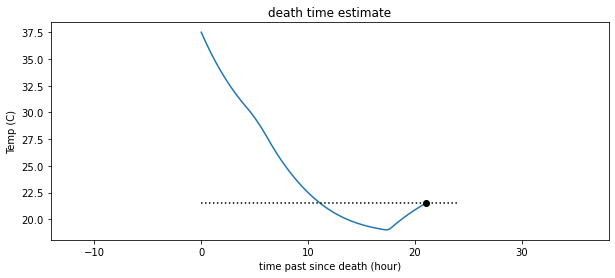

In [5]:
# Plot body temp, A, and B, and display the final state.

# === YOUR CODE HERE ===
plt.figure(figsize=[10,4])
plt.axis('equal')
plt.plot(final_sol.t, final_sol.y[0])  
plt.plot(final_sol.t[-1], final_sol.y[0][-1], "ko") 
plt.plot([0,24],[21.5,21.5], "k:")
plt.title('death time estimate');
plt.xlabel('time past since death (hour)')
plt.ylabel('Temp (C)');

print("Final State: ")
print("Time: ",final_sol.t[-1])
print("Temp: ",final_sol.y[0][-1])
print("A: ",final_sol.y[1][-1])
print("B: ",final_sol.y[2][-1])
print("The time of death is 1:45pm on October 6.")

## (c) Prime Suspect

James Carver could be the criminal. Since his whereabouts is not confirmed at 1:45pm on October 6.<br>
